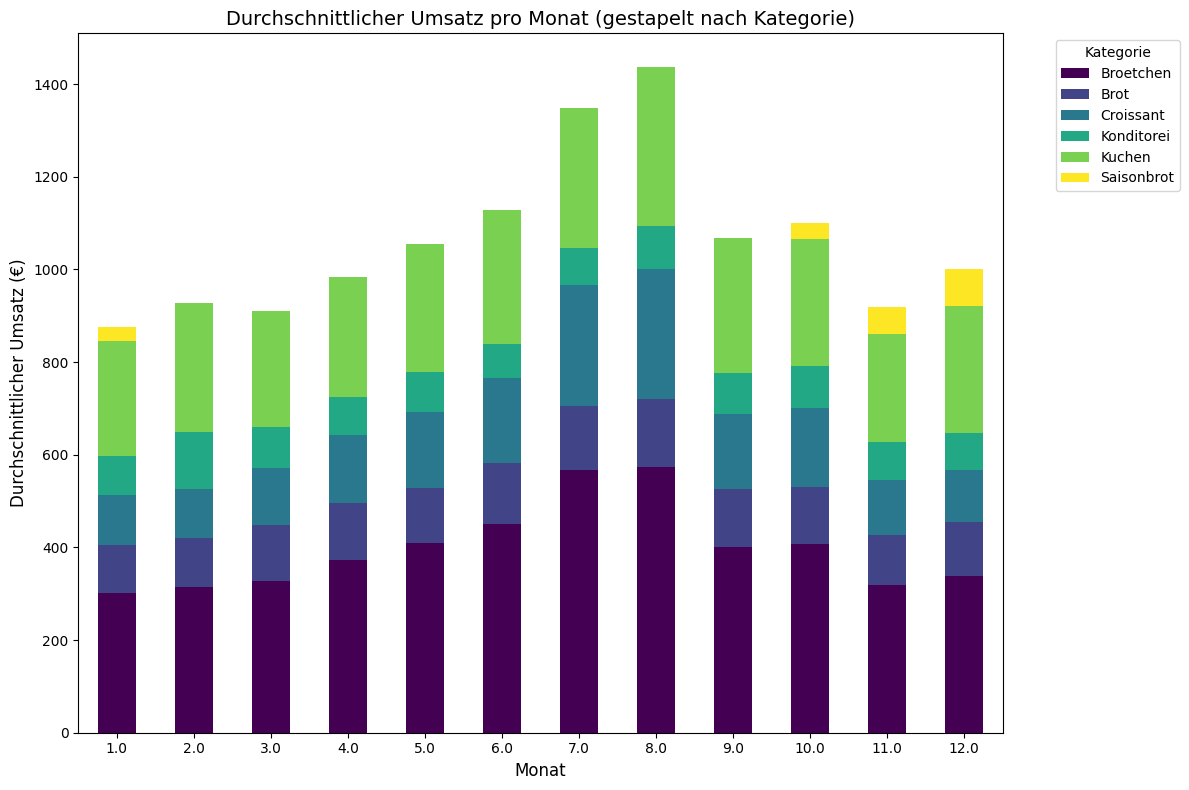

In [ ]:
# Umsatz pro Kategorie, nach Monat

import pandas as pd
import matplotlib.pyplot as plt

# Umsatzdaten einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv' , sep=',')

# Umsatz pro Monat und Kategorie aggregieren (Durchschnitt berechnen)
umsatz_pro_kategorie = (
    umsatz_gesamt.groupby(['Monat', 'Kategorie'])['Umsatz']
    .mean()
    .unstack(fill_value=0)  # Hier werden fehlende Werte durch 0 ersetzt
)

# Sicherstellen, dass alle Monate für jede Kategorie existieren (fill_value=0 bleibt)
umsatz_pro_kategorie = umsatz_pro_kategorie.fillna(0)

# Plot erstellen
umsatz_pro_kategorie.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8),  # Größeres Diagramm
    colormap='viridis'  # Farbpalette
)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Durchschnittlicher Umsatz pro Monat (gestapelt nach Kategorie)', fontsize=14)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xticks(rotation=0)  # X-Achse (Monat) gerade ausrichten
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Layout optimieren

# Diagramm anzeigen
plt.show()


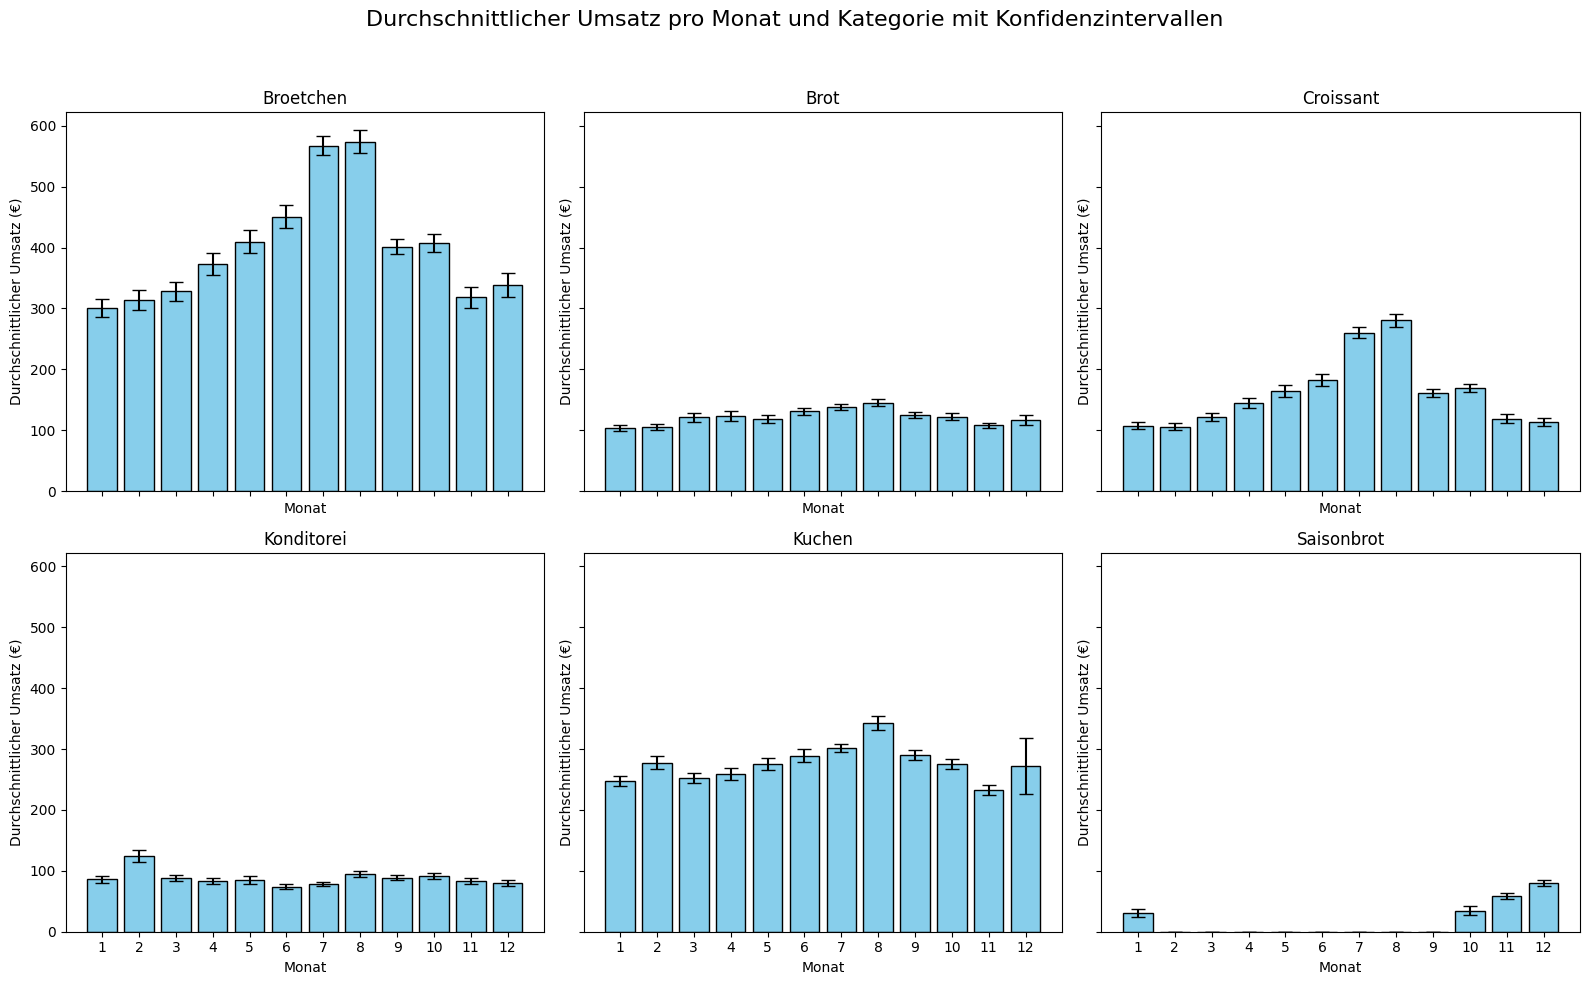

In [ ]:
# Umsatz pro Kategorie, nach Monat, mit Konfidenzintervallen

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Umsatzdaten einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv', sep=',')

# Umsatz pro Monat und Kategorie aggregieren (Durchschnitt berechnen)
umsatz_pro_kategorie = (
    umsatz_gesamt.groupby(['Monat', 'Kategorie'])['Umsatz']
    .agg(['mean', 'sem'])  # Berechnung des Durchschnitts und der Standardfehler des Mittelwerts
    .unstack(fill_value=0)  # Hier werden fehlende Werte durch 0 ersetzt
)

# Kategorien extrahieren
kategorien = umsatz_pro_kategorie['mean'].columns

# Subplots erstellen (2x3 Grid für 6 Kategorien)
fig, axes = plt.subplots(2, 3, figsize=(16, 10), sharex=True, sharey=True)  # Gemeinsame Achsen für bessere Vergleichbarkeit
axes = axes.flatten()

# Jeden Subplot für eine Kategorie erstellen
for i, kategorie in enumerate(kategorien):
    ax = axes[i]
    
    # Mittelwerte und Standardfehler (Konfidenzintervalle) für die aktuelle Kategorie extrahieren
    mittelwerte = umsatz_pro_kategorie['mean'][kategorie]
    fehler = umsatz_pro_kategorie['sem'][kategorie] * 1.96  # 95%-Konfidenzintervall (1.96 x Standardfehler)
    
    # Balkendiagramm mit Fehlerbalken erstellen
    ax.bar(
        mittelwerte.index,  # Monate (X-Achse)
        mittelwerte,        # Durchschnittlicher Umsatz
        yerr=fehler,        # Fehlerbalken für Konfidenzintervalle
        capsize=5,          # Endlinien der Fehlerbalken
        color='skyblue',    # Balkenfarbe
        edgecolor='black'   # Balkenumrandung
    )
    
    # Titel für die Kategorie setzen
    ax.set_title(kategorie, fontsize=12)
    ax.set_xlabel('Monat', fontsize=10)
    ax.set_ylabel('Durchschnittlicher Umsatz (€)', fontsize=10)
    ax.set_xticks(range(1, 13))  # Monate als X-Achse
    ax.set_xticklabels(range(1, 13), rotation=0)  # Monate von 1 bis 12 anzeigen

# Layout optimieren
plt.suptitle('Durchschnittlicher Umsatz pro Monat und Kategorie mit Konfidenzintervallen', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


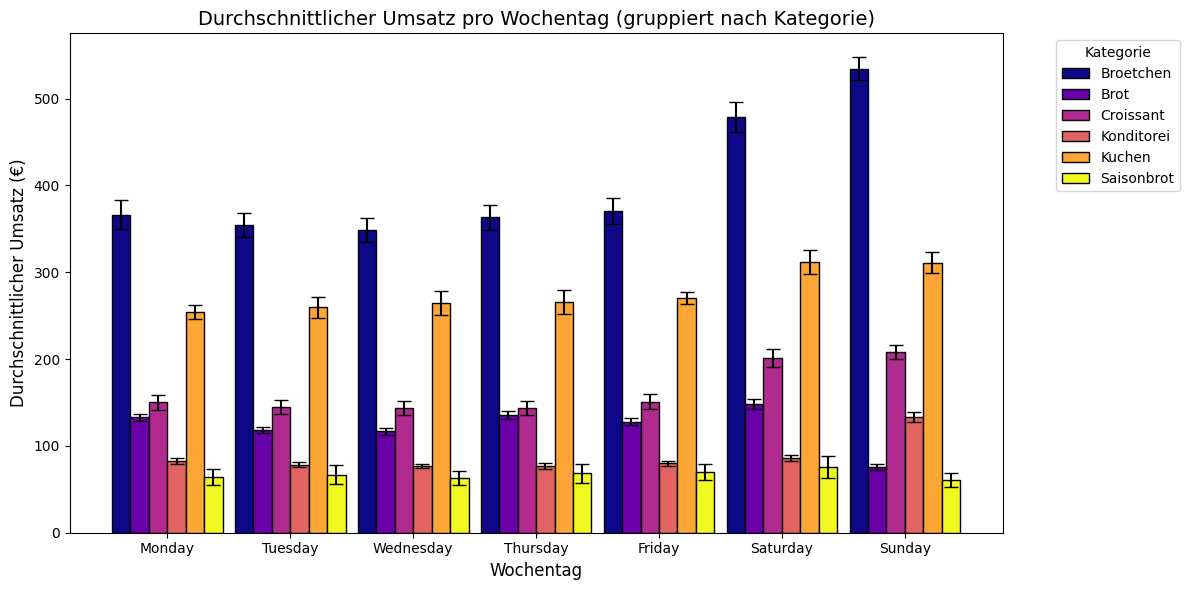

In [ ]:
# Umsatz pro Wochentag mit Konfidenzintervallen

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv', sep=',')

# Umsatz pro Wochentag und Kategorie aggregieren (Durchschnitt und Standardfehler berechnen)
umsatz_pro_wochentag = (
    umsatz_gesamt.groupby(['Wochentag', 'Kategorie'])['Umsatz']
    .agg(['mean', 'sem'])  # Durchschnitt und Standardfehler berechnen
    .unstack(fill_value=0)  # Kategorien als Spalten
)

# Wochentage sortieren (falls nötig)
wochentage_sortiert = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
umsatz_pro_wochentag = umsatz_pro_wochentag.reindex(wochentage_sortiert, level=0)

# Kategorien extrahieren
kategorien = umsatz_pro_wochentag['mean'].columns

# Gruppierte Balken vorbereiten
x = np.arange(len(wochentage_sortiert))  # Positionen der Wochentage
breite = 0.15  # Breite der Balken

# Subplot erstellen
fig, ax = plt.subplots(figsize=(12, 6))

# Farbpalette verwenden
farben = plt.cm.plasma(np.linspace(0, 1, len(kategorien)))

# Balken zeichnen
for i, kategorie in enumerate(kategorien):
    mittelwerte = umsatz_pro_wochentag['mean'][kategorie]
    fehler = umsatz_pro_wochentag['sem'][kategorie] * 1.96  # 95%-Konfidenzintervall
    ax.bar(
        x + i * breite,  # Position der Balken (verschoben für Gruppierung)
        mittelwerte,
        width=breite,
        label=kategorie,
        yerr=fehler,  # Fehlerbalken
        capsize=5,  # Endlinien der Fehlerbalken
        color=farben[i],  # Farbe aus der Farbpalette
        edgecolor='black'  # Balkenumrandung
    )

# Achsen und Titel anpassen
ax.set_xticks(x + (len(kategorien) - 1) * breite / 2)  # Mittige Positionierung der Wochentage
ax.set_xticklabels(wochentage_sortiert, rotation=0)
ax.set_title('Durchschnittlicher Umsatz pro Wochentag (gruppiert nach Kategorie)', fontsize=14)
ax.set_xlabel('Wochentag', fontsize=12)
ax.set_ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)

# Legende hinzufügen
ax.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout optimieren und Diagramm anzeigen
plt.tight_layout()
plt.show()


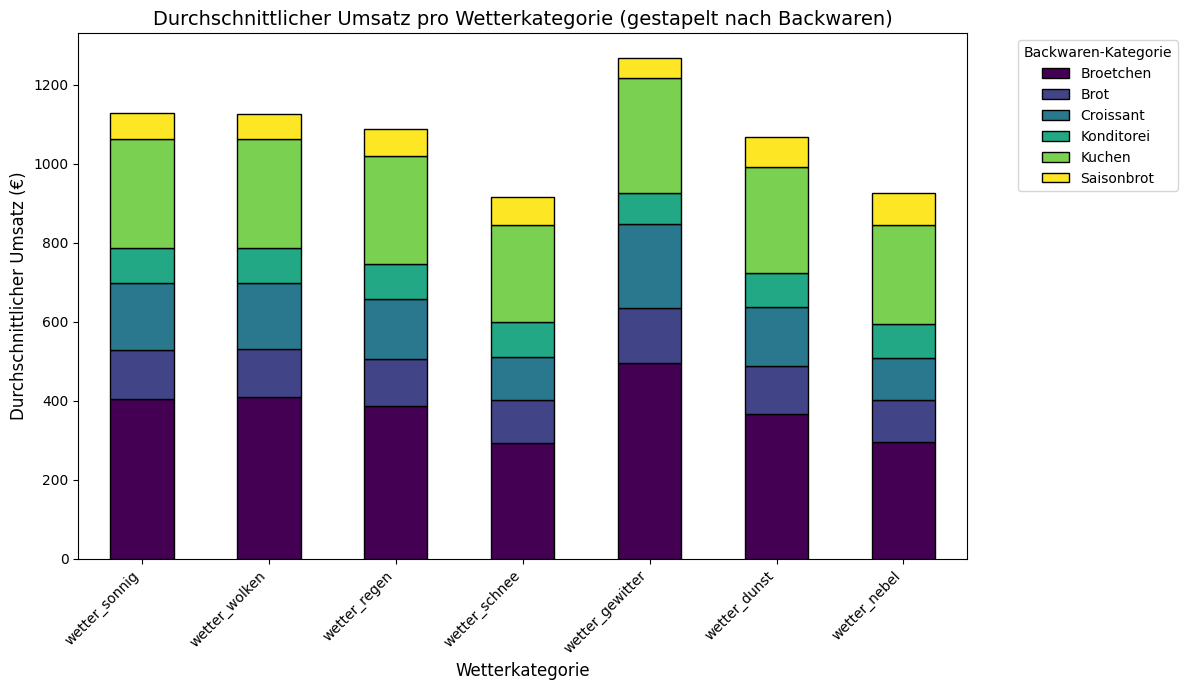

In [8]:
#Umsatz nach Wetterkategorie

import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv' , sep=',')

# Wetterkategorien auswählen (Spalten, die mit "wetter_" beginnen)
wetterkategorien = [col for col in umsatz_gesamt.columns if col.startswith('wetter_')]

# Vorbereitung des DataFrames für die gestapelten Daten
umsatz_stacked = pd.DataFrame()

for wetter in wetterkategorien:
    # Filter für die Zeilen, bei denen das Wetter zutrifft
    gefiltert = umsatz_gesamt[umsatz_gesamt[wetter] == 1]
    
    # Durchschnittlicher Umsatz je Backwaren-Kategorie
    durchschnitt = gefiltert.groupby('Kategorie')['Umsatz'].mean()
    
    # Spalte mit dem Wetter hinzufügen
    durchschnitt.name = wetter
    
    # Zusammenführen
    umsatz_stacked = pd.concat([umsatz_stacked, durchschnitt], axis=1)

# Fehlende Werte mit 0 ersetzen
umsatz_stacked = umsatz_stacked.fillna(0).T  # Transponieren für Wetterkategorien auf der X-Achse

# Plot erstellen
umsatz_stacked.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='viridis',  # Optionale Farbpalette
    edgecolor='black'
)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Durchschnittlicher Umsatz pro Wetterkategorie (gestapelt nach Backwaren)', fontsize=14)
plt.xlabel('Wetterkategorie', fontsize=12)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Wetterkategorien leicht schräg darstellen
plt.legend(title='Backwaren-Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Layout optimieren

# Diagramm anzeigen
plt.show()


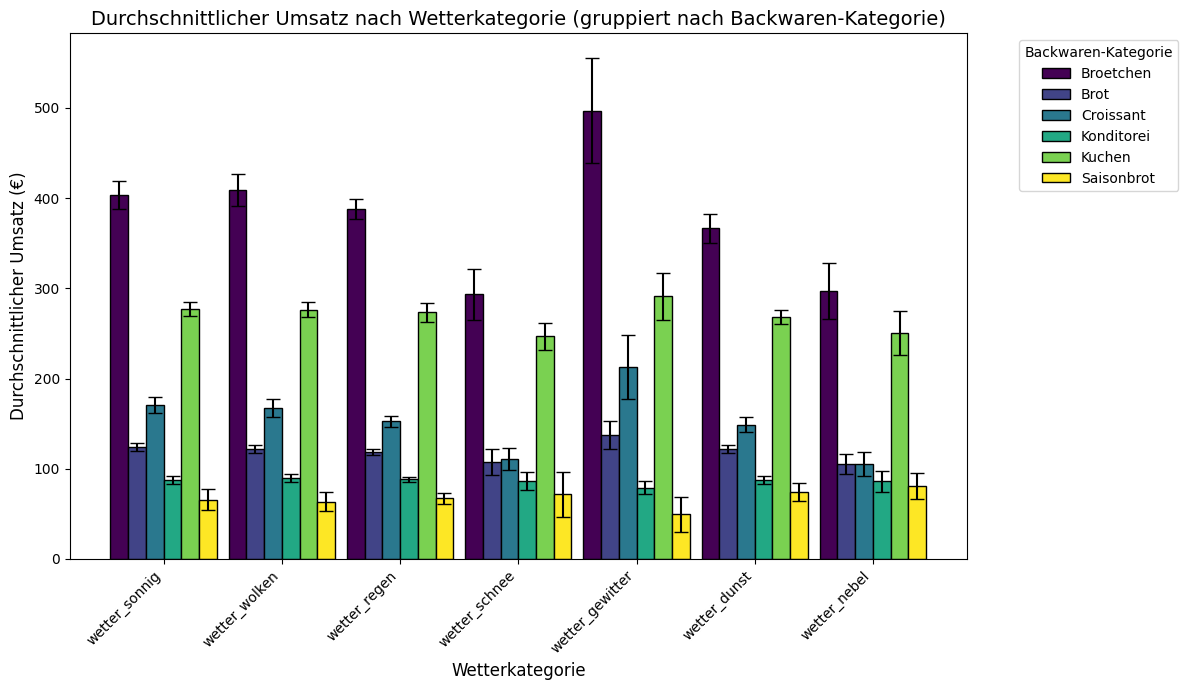

In [4]:
#Umsatz nach Wetterkategorie mit Konfidenzintervall

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv', sep=',')

# Wetterkategorien auswählen (Spalten, die mit "wetter_" beginnen)
wetterkategorien = [col for col in umsatz_gesamt.columns if col.startswith('wetter_')]

# Vorbereitung der Daten: Durchschnitt und Standardfehler für jede Wetterkategorie und Backwaren-Kategorie
umsatz_stats = pd.DataFrame()

for wetter in wetterkategorien:
    # Filter für Zeilen, bei denen das Wetter zutrifft
    gefiltert = umsatz_gesamt[umsatz_gesamt[wetter] == 1]
    
    # Durchschnitt und Standardfehler je Backwaren-Kategorie berechnen
    stats = gefiltert.groupby('Kategorie')['Umsatz'].agg(['mean', 'sem'])
    stats['Wetterkategorie'] = wetter  # Wetterkategorie hinzufügen
    umsatz_stats = pd.concat([umsatz_stats, stats])  # Zusammenführen

# Reset Index für einfache Verarbeitung
umsatz_stats.reset_index(inplace=True)

# Wetterkategorien und Backwaren-Kategorien extrahieren
wetter_kategorien = umsatz_stats['Wetterkategorie'].unique()
backwaren_kategorien = umsatz_stats['Kategorie'].unique()

# Gruppierte Balken vorbereiten
x = np.arange(len(wetter_kategorien))  # Positionen der Wetterkategorien
breite = 0.15  # Breite der Balken

# Subplot erstellen
fig, ax = plt.subplots(figsize=(12, 7))

# Farbpalette verwenden
farben = plt.cm.viridis(np.linspace(0, 1, len(backwaren_kategorien)))

# Balken zeichnen
for i, backware in enumerate(backwaren_kategorien):
    # Daten für die jeweilige Backwaren-Kategorie
    backware_data = umsatz_stats[umsatz_stats['Kategorie'] == backware]
    mittelwerte = backware_data['mean']
    fehler = backware_data['sem'] * 1.96  # 95%-Konfidenzintervall
    
    # Balken hinzufügen
    ax.bar(
        x + i * breite,  # Verschieben der Balkenposition
        mittelwerte,
        width=breite,
        label=backware,
        yerr=fehler,  # Fehlerbalken
        capsize=5,  # Endlinien der Fehlerbalken
        color=farben[i],  # Farben aus der Farbpalette
        edgecolor='black'  # Balkenumrandung
    )

# Achsen und Titel anpassen
ax.set_xticks(x + (len(backwaren_kategorien) - 1) * breite / 2)  # Mittige Positionierung der Wetterkategorien
ax.set_xticklabels(wetter_kategorien, rotation=45, ha='right')
ax.set_title('Durchschnittlicher Umsatz nach Wetterkategorie (gruppiert nach Backwaren-Kategorie)', fontsize=14)
ax.set_xlabel('Wetterkategorie', fontsize=12)
ax.set_ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)

# Legende hinzufügen
ax.legend(title='Backwaren-Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout optimieren und Diagramm anzeigen
plt.tight_layout()
plt.show()


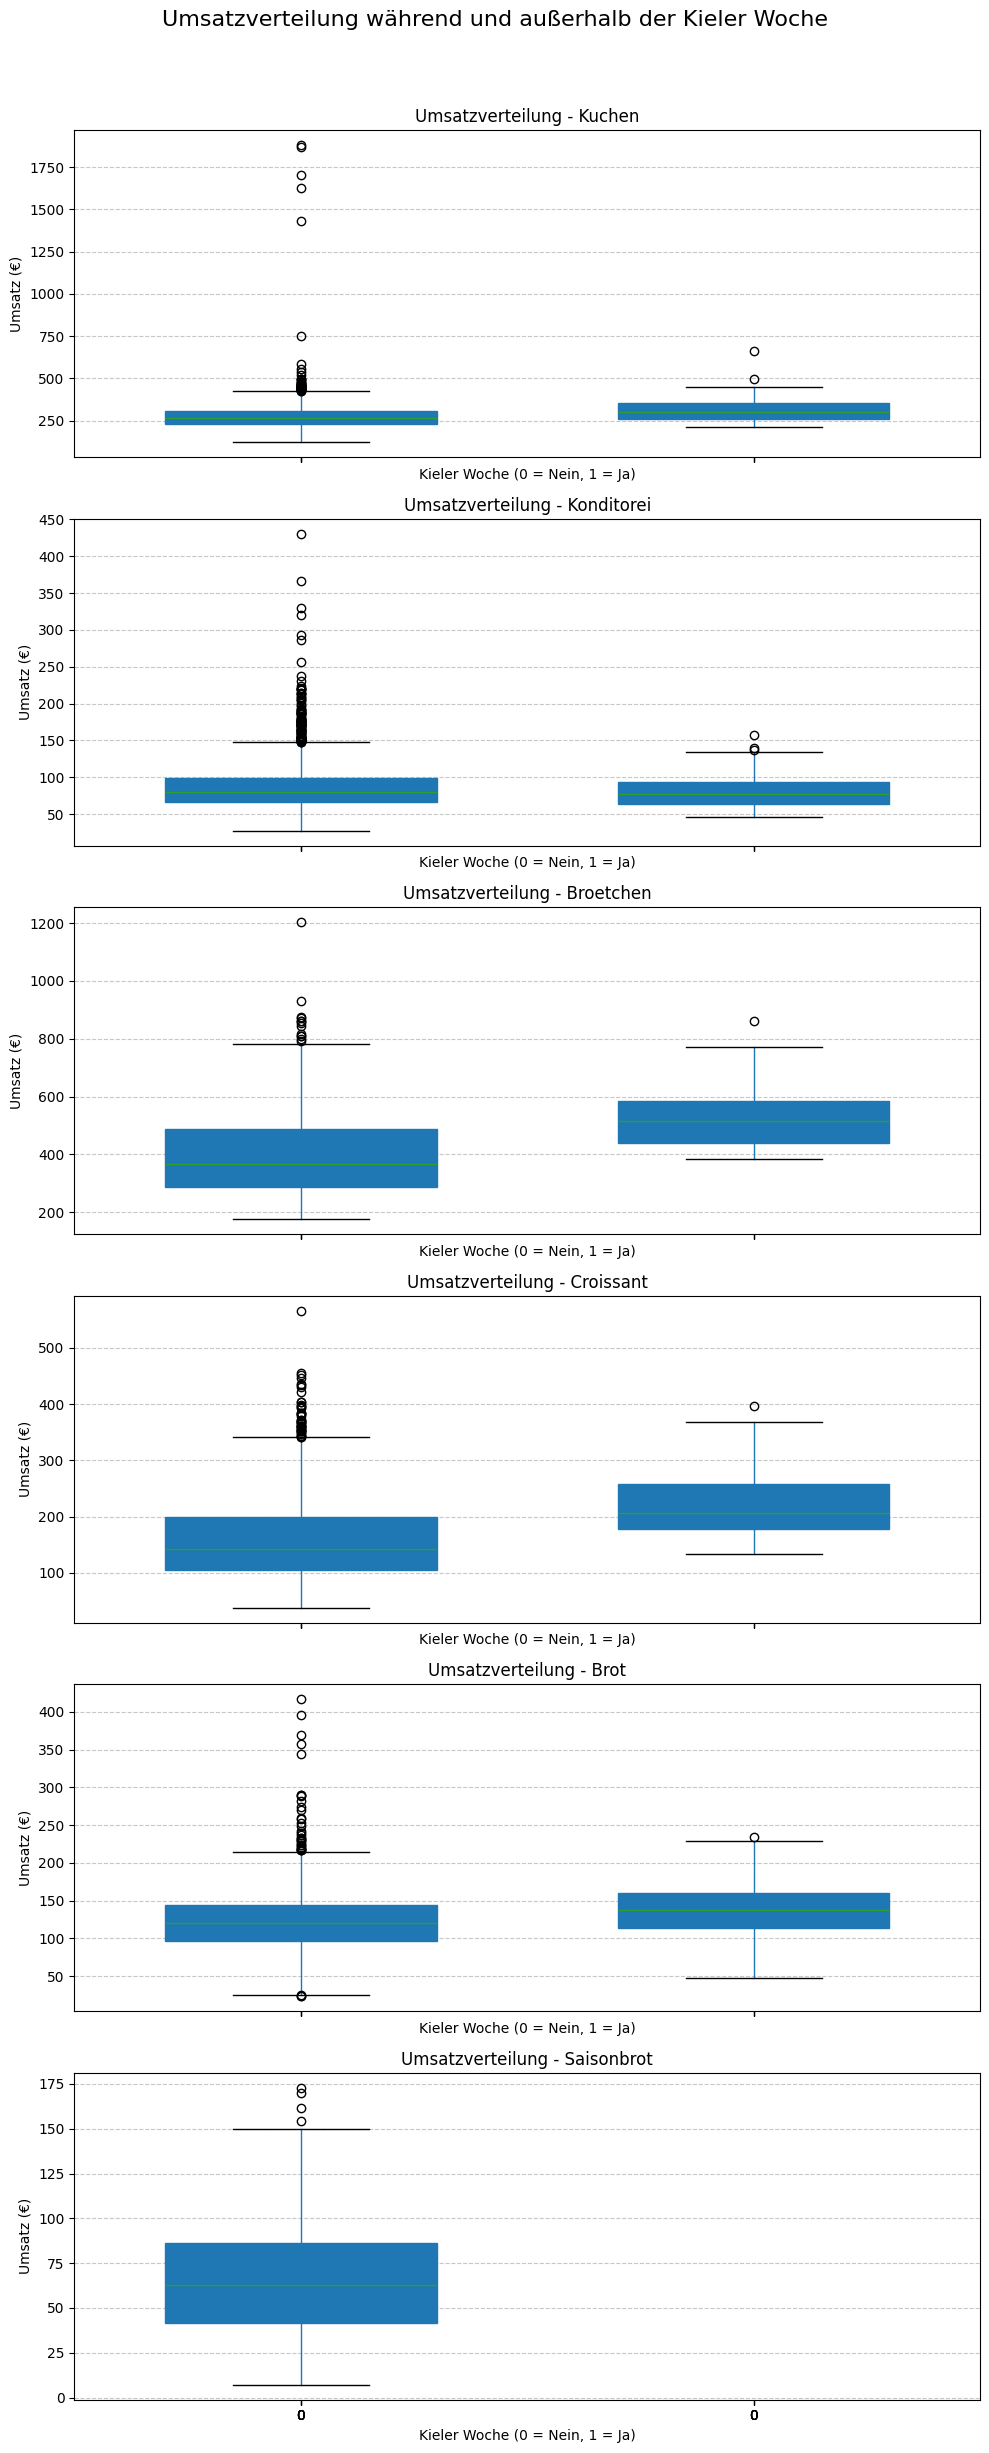

In [ ]:
#Boxplots mit durchschn. Umsatzwerten für jede Backwaren-Kategorie, während und außerhalb Kieler Woche

import pandas as pd
import matplotlib.pyplot as plt

# Datensatz einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv', sep=',')

# Daten vorbereiten
kategorien = umsatz_gesamt['Kategorie'].unique()  # Alle einzigartigen Kategorien abrufen

# Subplots erstellen
fig, axes = plt.subplots(len(kategorien), 1, figsize=(10, len(kategorien) * 4), sharex=True)

# Für jede Kategorie Boxplots erstellen
for i, kategorie in enumerate(kategorien):
    ax = axes[i]
    # Daten für die aktuelle Kategorie filtern
    kategorie_data = umsatz_gesamt[umsatz_gesamt['Kategorie'] == kategorie]

    # Boxplot erstellen: Umsatz getrennt nach Kieler Woche (0 und 1)
    kategorie_data.boxplot(
        column='Umsatz', 
        by='KielerWoche', 
        ax=ax, 
        grid=False, 
        widths=0.6, 
        patch_artist=True
    )
    
    # Achsentitel und Diagrammtitel setzen
    ax.set_title(f'Umsatzverteilung - {kategorie}', fontsize=12)
    ax.set_xlabel('Kieler Woche (0 = Nein, 1 = Ja)', fontsize=10)
    ax.set_ylabel('Umsatz (€)', fontsize=10)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Übergeordneten Titel hinzufügen
plt.suptitle('Umsatzverteilung während und außerhalb der Kieler Woche', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


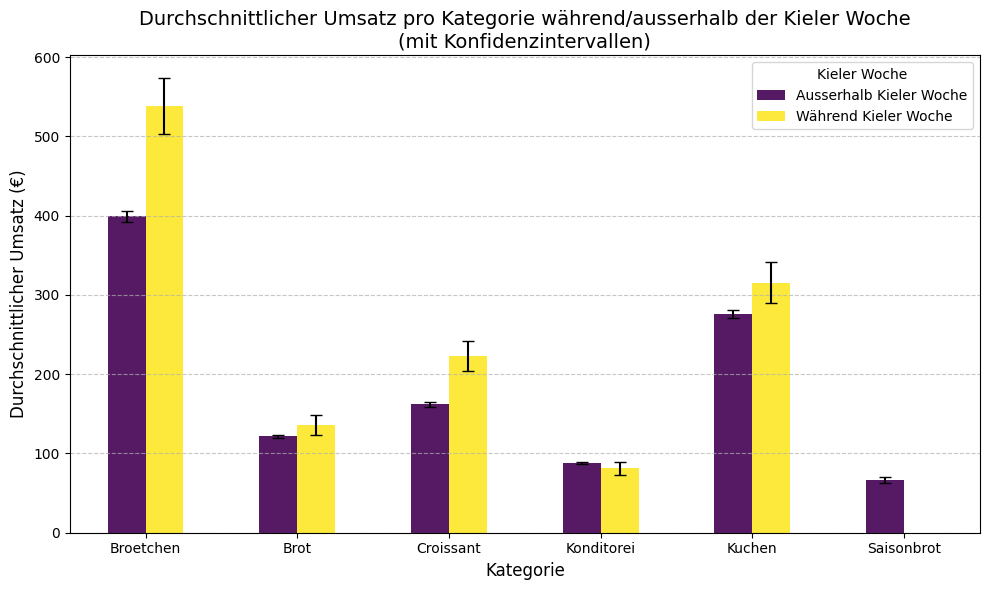

In [ ]:
#Balkendiagramm mit Konfidenzintervall zum Vergleich Umsatz pro Kategorie während/ außerhalb der Kieler Woche

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem, t

# Datensatz einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv', sep=',')

# Funktion zur Berechnung des Konfidenzintervalls
def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    if n == 0:
        return 0  # Kein Datenpunkt, keine Breite
    mean = np.mean(data)
    error = sem(data)  # Standardfehler
    margin = error * t.ppf((1 + confidence) / 2, n - 1)  # T-Wert für Konfidenzintervall
    return margin

# Umsatz pro Kategorie und Kieler Woche aggregieren
umsatz_grouped = umsatz_gesamt.groupby(['Kategorie', 'KielerWoche'])['Umsatz']

# Mittelwerte und Konfidenzintervalle berechnen
means = umsatz_grouped.mean().unstack()
conf_intervals = umsatz_grouped.apply(lambda x: calculate_confidence_interval(x)).unstack()

# Balkendiagramm mit Fehlerbalken
fig, ax = plt.subplots(figsize=(10, 6))
means.plot(kind='bar', yerr=conf_intervals, ax=ax, capsize=4, colormap='viridis', alpha=0.9)

# Titel und Achsenbeschriftungen hinzufügen
ax.set_title('Durchschnittlicher Umsatz pro Kategorie während/ausserhalb der Kieler Woche\n(mit Konfidenzintervallen)', fontsize=14)
ax.set_xlabel('Kategorie', fontsize=12)
ax.set_ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
ax.legend(title='Kieler Woche', labels=['Ausserhalb Kieler Woche', 'Während Kieler Woche'], loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Layout anpassen
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


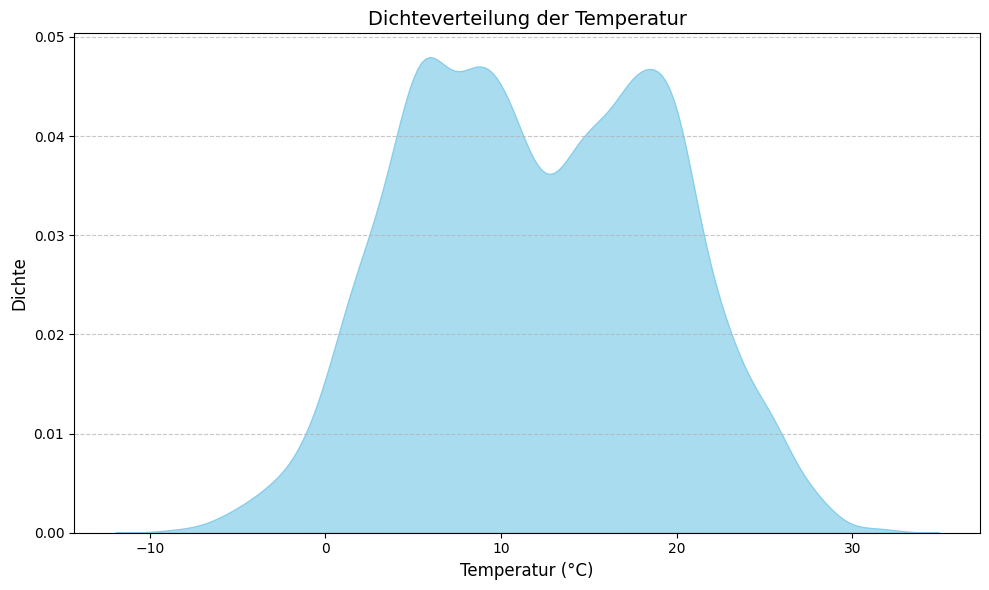

In [2]:
#Dichteverteilung der Temperatur, um zu entscheiden, was sinnvolle bins für die Temperatur sind

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datensatz einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv', sep=',')

# Dichtediagramm der Temperatur
plt.figure(figsize=(10, 6))
sns.kdeplot(data=umsatz_gesamt, x='Temperatur', fill=True, color='skyblue', alpha=0.7)
plt.title('Dichteverteilung der Temperatur', fontsize=14)
plt.xlabel('Temperatur (°C)', fontsize=12)
plt.ylabel('Dichte', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Temperatur_Bin
Kalt       4024
Moderat    3890
Warm       1404
Name: count, dtype: int64
        Datum  Warengruppe      Umsatz Wochentag   Kategorie  KielerWoche  \
0  2013-07-01          5.0  317.475875    Monday      Kuchen            0   
1  2013-07-01          4.0   65.890169    Monday  Konditorei            0   
2  2013-07-01          2.0  535.856285    Monday   Broetchen            0   
3  2013-07-01          3.0  201.198426    Monday   Croissant            0   
4  2013-07-01          1.0  148.828353    Monday        Brot            0   

   Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  Monat  \
0         6.0     17.8375                 15.0        20.0    7.0   
1         6.0     17.8375                 15.0        20.0    7.0   
2         6.0     17.8375                 15.0        20.0    7.0   
3         6.0     17.8375                 15.0        20.0    7.0   
4         6.0     17.8375                 15.0        20.0    7.0   

   wetter_sonnig  wetter_wolken  

/tmp/ipykernel_1726/914622176.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  umsatz_gesamt.groupby(['Temperatur_Bin', 'Kategorie'])['Umsatz']


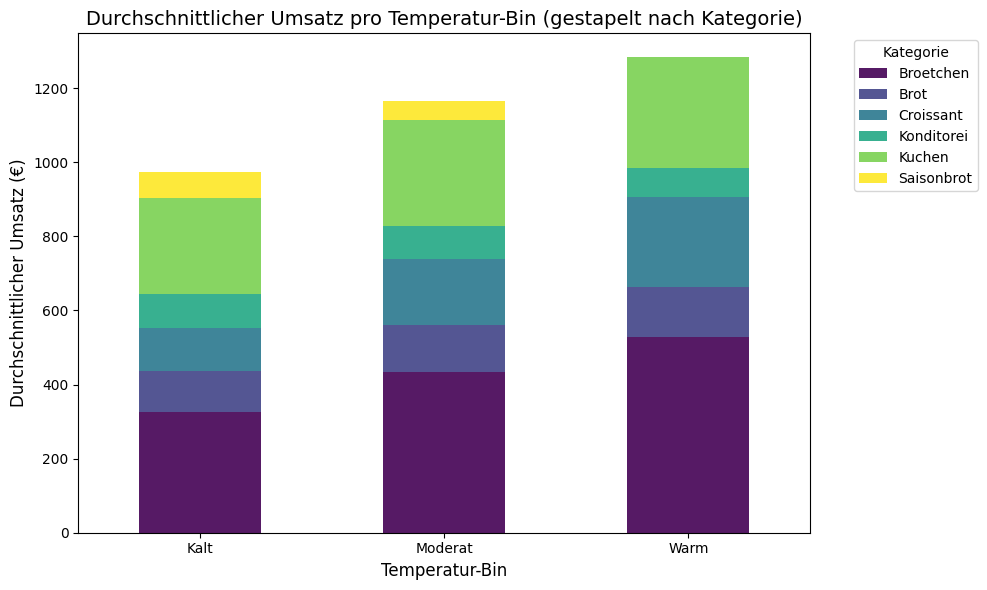

In [16]:
# Temperatur-Bins definieren und den Umsatz pro Temperatur-Bin darstellen
bins = [-float('inf'), 10, 20, float('inf')]  # Beispiel für Bins
labels = ['Kalt', 'Moderat', 'Warm']

# Temperatur-Bins der Spalte hinzufügen
umsatz_gesamt['Temperatur_Bin'] = pd.cut(umsatz_gesamt['Temperatur'], bins=bins, labels=labels)

# Kontrolle der Verteilung in den Bins
print(umsatz_gesamt['Temperatur_Bin'].value_counts())

print(umsatz_gesamt.head())

#Neuen Datensatz mit Temperatur-Bins speichern

umsatz_gesamt.to_csv('umsatz_gesamt.csv', index=False)

# Daten aggregieren: Durchschnittlicher Umsatz pro Temperatur-Bin und Kategorie
umsatz_bins = (
    umsatz_gesamt.groupby(['Temperatur_Bin', 'Kategorie'])['Umsatz']
    .mean()
    .unstack(fill_value=0)  # Kategorien als Spalten
)

# Gestapeltes Balkendiagramm erstellen
umsatz_bins.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis',  # Optionale Farbpalette
    alpha=0.9
)

# Diagramm formatieren
plt.title('Durchschnittlicher Umsatz pro Temperatur-Bin (gestapelt nach Kategorie)', fontsize=14)
plt.xlabel('Temperatur-Bin', fontsize=12)
plt.ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)
plt.xticks(rotation=0)  # X-Achse (Temperatur-Bin) gerade ausrichten
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Layout optimieren

# Diagramm anzeigen
plt.show()

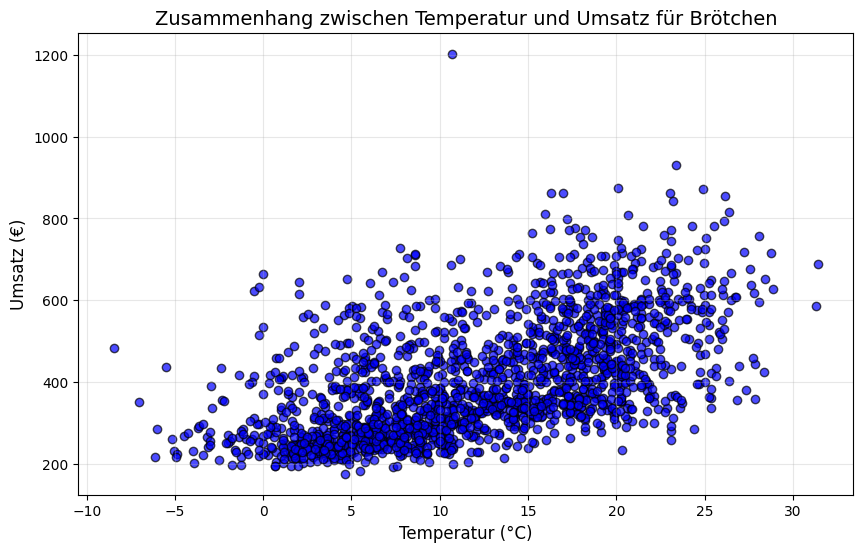

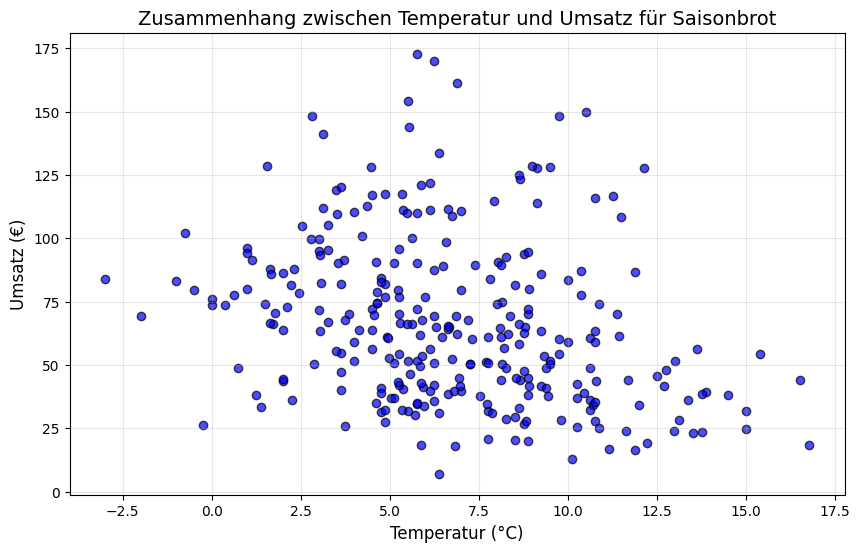

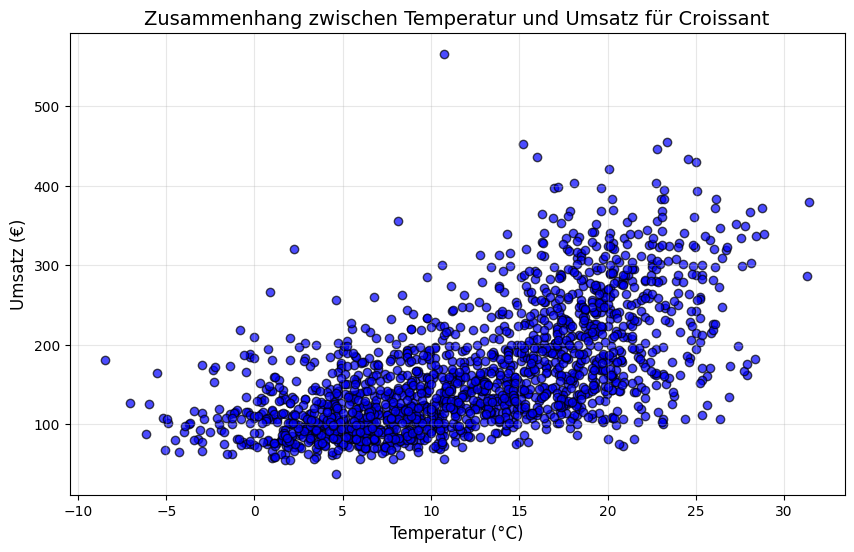

In [7]:
# Scatterplots erstellen zur Korrelation von Temperatur und Umsatz einzelner Backwaren

import matplotlib.pyplot as plt

# Daten filtern: Nur Brötchen aus der Kategorie auswählen
broetchen_data = umsatz_gesamt[umsatz_gesamt['Kategorie'] == 'Broetchen']

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(broetchen_data['Temperatur'], broetchen_data['Umsatz'], alpha=0.7, color='blue', edgecolor='k')

# Diagramm formatieren
plt.title('Zusammenhang zwischen Temperatur und Umsatz für Brötchen', fontsize=14)
plt.xlabel('Temperatur (°C)', fontsize=12)
plt.ylabel('Umsatz (€)', fontsize=12)
plt.grid(True, alpha=0.3)  # Optionale Rasterlinien

# Diagramm anzeigen
plt.show()

# Daten filtern: Nur Saisonbrot aus der Kategorie auswählen
saisonbrot_data = umsatz_gesamt[umsatz_gesamt['Kategorie'] == 'Saisonbrot']

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(saisonbrot_data['Temperatur'], saisonbrot_data['Umsatz'], alpha=0.7, color='blue', edgecolor='k')

# Diagramm formatieren
plt.title('Zusammenhang zwischen Temperatur und Umsatz für Saisonbrot', fontsize=14)
plt.xlabel('Temperatur (°C)', fontsize=12)
plt.ylabel('Umsatz (€)', fontsize=12)
plt.grid(True, alpha=0.3)  # Optionale Rasterlinien

# Diagramm anzeigen
plt.show()


# Daten filtern: Nur Croissant aus der Kategorie auswählen
croissant_data = umsatz_gesamt[umsatz_gesamt['Kategorie'] == 'Croissant']

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(croissant_data['Temperatur'], croissant_data['Umsatz'], alpha=0.7, color='blue', edgecolor='k')

# Diagramm formatieren
plt.title('Zusammenhang zwischen Temperatur und Umsatz für Croissant', fontsize=14)
plt.xlabel('Temperatur (°C)', fontsize=12)
plt.ylabel('Umsatz (€)', fontsize=12)
plt.grid(True, alpha=0.3)  # Optionale Rasterlinien

# Diagramm anzeigen
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (6,).

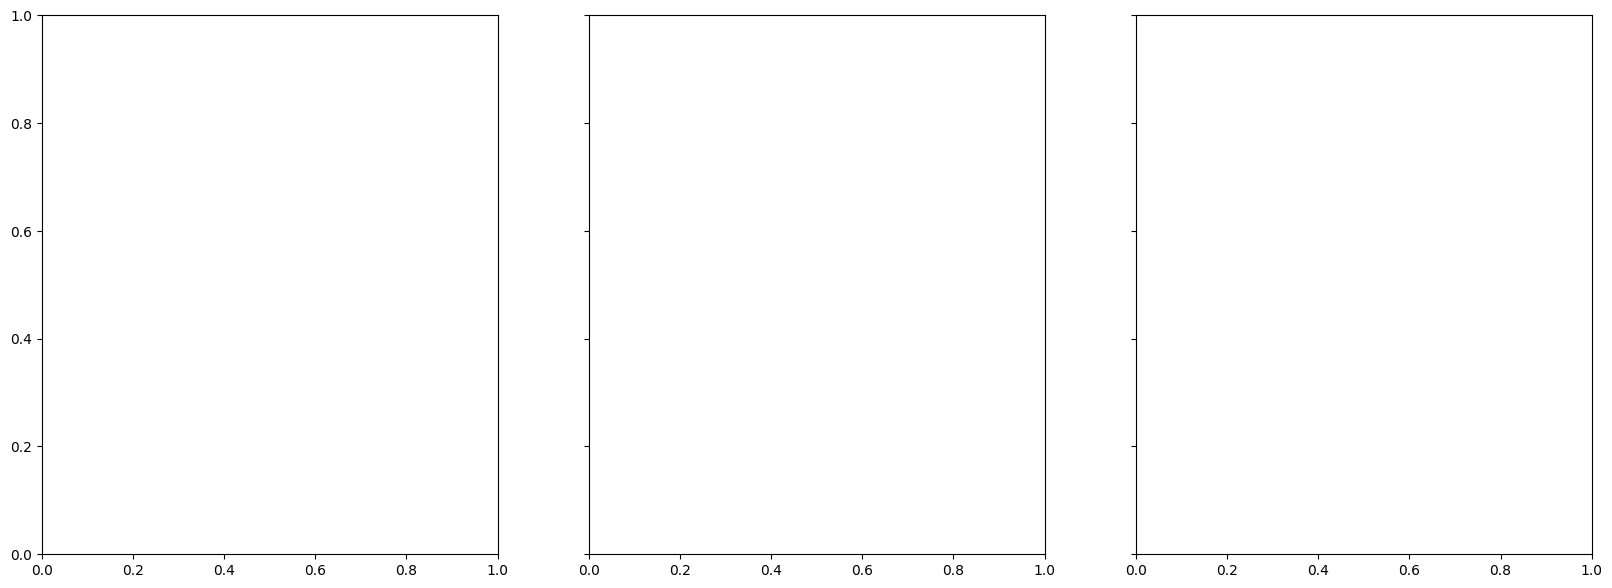

In [14]:
#Plotten des Umsatzes nach Wetter und Temeratur-Bin


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten einlesen
umsatz_gesamt = pd.read_csv('/workspaces/Bakery-Project/0_DataPreparation/Data/umsatz_gesamt.csv', sep=',')

# Wetterkategorien auswählen (Spalten, die mit "wetter_" beginnen)
wetterkategorien = [col for col in umsatz_gesamt.columns if col.startswith('wetter_')]

# Temperatur-Bins auswählen
temperatur_bins = umsatz_gesamt['Temperatur_Bin'].unique()

# Vorbereitung der Daten: Durchschnitt und Standardfehler je Wetterkategorie, Backwaren-Kategorie und Temperatur-Bin
umsatz_stats = pd.DataFrame()

for temperatur_bin in temperatur_bins:
    # Filter für die aktuelle Temperatur-Bin
    gefiltert = umsatz_gesamt[umsatz_gesamt['Temperatur_Bin'] == temperatur_bin]
    
    for wetter in wetterkategorien:
        wetter_daten = gefiltert[gefiltert[wetter] == 1]
        # Durchschnitt und Standardfehler je Backwaren-Kategorie berechnen
        stats = wetter_daten.groupby('Kategorie')['Umsatz'].agg(['mean', 'sem'])
        stats['Wetterkategorie'] = wetter
        stats['Temperatur_Bin'] = temperatur_bin  # Temperatur-Bin hinzufügen
        umsatz_stats = pd.concat([umsatz_stats, stats])  # Zusammenführen

# Reset Index für einfache Verarbeitung
umsatz_stats.reset_index(inplace=True)

# Wetterkategorien und Backwaren-Kategorien extrahieren
wetter_kategorien = umsatz_stats['Wetterkategorie'].unique()
backwaren_kategorien = umsatz_stats['Kategorie'].unique()

# Subplots erstellen
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)  # Drei Subplots nebeneinander, gemeinsame Y-Achse
farben = plt.cm.viridis(np.linspace(0, 1, len(backwaren_kategorien)))  # Farbpalette

# Durch Subplots iterieren
for ax, temperatur_bin in zip(axes, temperatur_bins):
    # Daten für die aktuelle Temperatur-Bin filtern
    temp_data = umsatz_stats[umsatz_stats['Temperatur_Bin'] == temperatur_bin]
    
    x = np.arange(len(wetter_kategorien))  # Positionen der Wetterkategorien
    breite = 0.15  # Breite der Balken

    # Balken für jede Backwaren-Kategorie hinzufügen
    for i, backware in enumerate(backwaren_kategorien):
        # Daten für die jeweilige Backwaren-Kategorie
        backware_data = temp_data[temp_data['Kategorie'] == backware]
        mittelwerte = backware_data['mean']
        fehler = backware_data['sem'] * 1.96  # 95%-Konfidenzintervall
        
        ax.bar(
            x + i * breite,  # Verschieben der Balkenposition
            mittelwerte,
            width=breite,
            label=backware if ax == axes[0] else "",  # Nur in der ersten Achse die Legende anzeigen
            yerr=fehler,  # Fehlerbalken
            capsize=5,  # Endlinien der Fehlerbalken
            color=farben[i],  # Farben aus der Farbpalette
            edgecolor='black'  # Balkenumrandung
        )
    
    # Achsen und Titel anpassen
    ax.set_title(f'Umsatz nach Wetterkategorie\n({temperatur_bin})', fontsize=14)
    ax.set_xticks(x + (len(backwaren_kategorien) - 1) * breite / 2)  # Mittige Positionierung der Wetterkategorien
    ax.set_xticklabels(wetter_kategorien, rotation=45, ha='right')
    ax.set_xlabel('Wetterkategorie', fontsize=12)
    
# Gemeinsame Y-Achse hinzufügen
axes[0].set_ylabel('Durchschnittlicher Umsatz (€)', fontsize=12)

# Legende nur einmal anzeigen
fig.legend(
    title='Backwaren-Kategorie',
    bbox_to_anchor=(1.02, 0.5),
    loc='center left'
)

# Layout optimieren und Diagramme anzeigen
plt.tight_layout()
plt.show()


print(umsatz_gesamt.columns)  # Überprüfe, ob 'Temperatur_Bin' unter den Spalten ist
print(umsatz_gesamt['Temperatur_Bin'].unique())  # Überprüfe die Bins



In [15]:
print(umsatz_gesamt.columns)  # Überprüfe, ob 'Temperatur_Bin' unter den Spalten ist
print(umsatz_gesamt['Temperatur_Bin'].unique())  # Überprüfe die Bins


Index(['Datum', 'Warengruppe', 'Umsatz', 'Wochentag', 'Kategorie',
       'KielerWoche', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit',
       'Wettercode', 'Monat', 'wetter_sonnig', 'wetter_wolken', 'wetter_regen',
       'wetter_schnee', 'wetter_gewitter', 'wetter_dunst', 'wetter_nebel',
       'Temperatur_Bin'],
      dtype='object')
['Moderat' 'Warm' 'Kalt' nan]
